In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Exploration

In [6]:
folder = "../decathlon/test_data_scientist/"

In [7]:
#load data as dataframe with Pandas
df_train = pd.read_csv(os.path.join(folder,"train.csv"))
df_test = pd.read_csv(os.path.join(folder,"test.csv"))
df_bu_feat = pd.read_csv(os.path.join(folder,"bu_feat.csv"))

Because some actions are useful for different questions, they have been made initially

In [3]:
df_train.head(2)

,day_id,but_num_business_unit,dpt_num_department,turnover
0,2017-09-30,64,127,580.308443
1,2017-09-30,119,127,1512.995918


In [4]:
df_bu_feat.head(2)

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
0,1609,80100,50.096306,1.867220,69,4
1,1995,95700,48.991087,2.520903,3,6


In [5]:
#convert "day_id" columns into a datetime column to easily extract year information
df_train["day_id"] = pd.to_datetime(df_train["day_id"], format="%Y-%m-%d")
df_train["year"] = df_train["day_id"].dt.year
df_test["day_id"] = pd.to_datetime(df_test["day_id"], format="%Y-%m-%d")
df_test["year"] = df_test["day_id"].dt.year

In [6]:
print("train data contains years : ",list(df_train["year"].unique()))
print("test data contains years : ",list(df_test["year"].unique()))

train data contains years :  [2017, 2016, 2015, 2014, 2013, 2012]
test data contains years :  [2017]


## Which department made the highest turnover in 2016?

In [7]:
#filter dataframe train with year 2016
df_train_2016 = df_train[df_train["year"]==2016]

In [8]:
#select department and turnover columns to not work on useless columns
#group by department and sum over the turnover column
#reset index is used to obtain a "normal" dataframe (without the groupby structure)
df_train_2016_grouped = df_train_2016[["dpt_num_department","turnover"]].groupby(["dpt_num_department"]).sum().reset_index()

In [9]:
df_train_2016_grouped

,dpt_num_department,turnover
0,73,1.974491e+06
1,88,5.696284e+06
2,117,6.535299e+06
3,127,3.378005e+07


In [10]:
#select the department having the highest turnover
df_train_2016_grouped[df_train_2016_grouped["turnover"] == df_train_2016_grouped["turnover"].max()]

,dpt_num_department,turnover
3,127,3.378005e+07


The department with the highest turnover in 2016 is department number 127

## What are the top 5 week numbers (1 to 53) for department 88 in 2015 in terms of turnover over all stores?

In [11]:
#filter dataframe train with year 2015 and department number 88
df_train_2015_88 = df_train[(df_train["year"]==2015) & (df_train["dpt_num_department"]==88)]

In [12]:
#extract week number from the date
df_train_2015_88["week_number"] = df_train_2015_88["day_id"].dt.isocalendar().week

/home/louis/miniconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df_train_2015_88.head(2)

,day_id,but_num_business_unit,dpt_num_department,turnover,year,week_number
110904,2015-12-26,119,88,574.940063,2015,52
110910,2015-12-26,229,88,230.841022,2015,52


In [14]:
#select week number and turnover columns to not work on useless columns
#group by week number and sum over the turnover column
#reset index is used to obtain a "normal" dataframe (without the groupby structure)
df_train_2015_88_grouped = df_train_2015_88[["week_number","turnover"]].groupby(["week_number"]).sum().reset_index()

In [15]:
df_train_2015_88_grouped.nlargest(5,"turnover")

,week_number,turnover
26,27,141679.864768
36,37,139674.400588
35,36,137825.642436
37,38,137232.460861
27,28,125835.541415


The top 5 week numbers for department 88 in 2015 in terms of turnover over all stores are : 27, 37, 36, 38, 28.

## What was the top performer store in 2014?

In [16]:
#filter dataframe train with year 2015 and department number 88
df_train_2014 = df_train[df_train["year"]==2014]

In [17]:
#select the business unit number and turnover columns to not work on useless columns
#group by the business unit number and sum over the turnover column
#reset index is used to obtain a "normal" dataframe (without the groupby structure)
df_train_2014_grouped = df_train_2014[["but_num_business_unit","turnover"]].groupby(["but_num_business_unit"]).sum().reset_index()

In [18]:
#select the business unit number having the highest turnover
df_train_2014_grouped[df_train_2014_grouped["turnover"] == df_train_2014_grouped["turnover"].max()]

,but_num_business_unit,turnover
93,121,327806.356464


The top performer store, meaning the store with the highest turnover, in 2014 is the store 121.

## Based on sales can you guess what kind of sport represents departement 73?

In [19]:
df_train["month"] = df_train["day_id"].dt.month

In [20]:
df_train_sales_73 = df_train[["year","turnover","month","dpt_num_department"]]

In [21]:
#filter dataframe train with departement 73
df_train_sales_73 = df_train_sales_73[df_train_sales_73["dpt_num_department"]==73]

In [22]:
year=2016

<AxesSubplot:title={'center':'Turnover by month during year 2016 for the departments 73'}, xlabel='month', ylabel='turnover'>

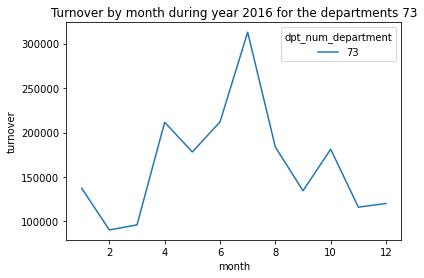

In [23]:
df_train_sales_73 = df_train_sales_73[(df_train_sales_73["year"]==year)]
df_train_sales_73 = df_train_sales_73[["turnover","month","dpt_num_department"]]
df_train_sales_73_grouped = df_train_sales_73.groupby(["dpt_num_department","month"]).sum().reset_index()
plt.figure(1)
plt.title(f"Turnover by month during year {year} for the departments 73")
sns.lineplot(data=df_train_sales_73_grouped, x='month', y='turnover', hue='dpt_num_department',palette="tab10")

In [24]:
df_train_sales_73_grouped[df_train_sales_73_grouped["month"]==7]

,dpt_num_department,month,turnover
6,73,7,312824.850986


The sport that represents department 73 is related to summer period. The highest turnover in July is around 1/7 of the turnover of department 117 at its highest period, meaning it is not that popular. I guess it is related to water like sailing or diving.

## Based on sales can you guess what kind of sport represents departement 117?

In [25]:
df_train_sales_117 = df_train[["year","turnover","month","dpt_num_department"]]

In [26]:
#filter dataframe train with departement 117
df_train_sales_117 = df_train_sales_117[df_train_sales_117["dpt_num_department"]==117]

In [27]:
year=2016

<AxesSubplot:title={'center':'Turnover by month during year 2016 for the departments 117'}, xlabel='month', ylabel='turnover'>

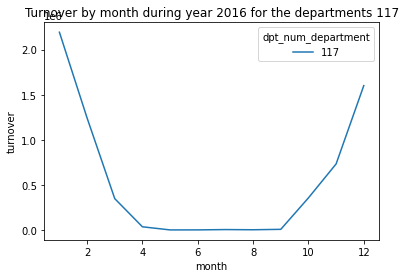

In [28]:
df_train_sales_117 = df_train_sales_117[(df_train_sales_117["year"]==year)]
df_train_sales_117 = df_train_sales_117[["turnover","month","dpt_num_department"]]
df_train_sales_117_grouped = df_train_sales_117.groupby(["dpt_num_department","month"]).sum().reset_index()
plt.figure(1)
plt.title(f"Turnover by month during year {year} for the departments 117")
sns.lineplot(data=df_train_sales_117_grouped, x='month', y='turnover', hue='dpt_num_department',palette="tab10")

In [29]:
df_train_sales_117_grouped[df_train_sales_117_grouped["month"]==1]

,dpt_num_department,month,turnover
0,117,1,2.192003e+06


The sport that represents department 117 is related to winter period. Due to the turnover at its highest period, I guess it is a mountain sport (ski, hiking, mountainering, ...) because objects related to this sport can be used for everyday life.

## What other insights can you draw from the data? Provide plots and figures if needed.

In [30]:
df_train_periode_vente = df_train[["year","turnover","month","dpt_num_department"]]

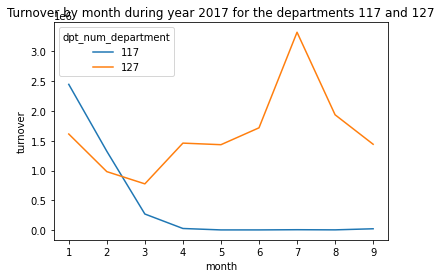

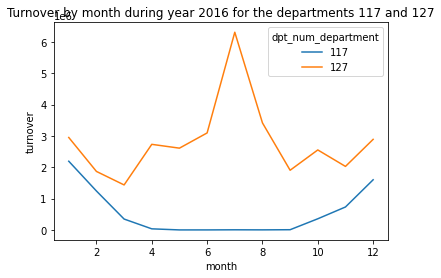

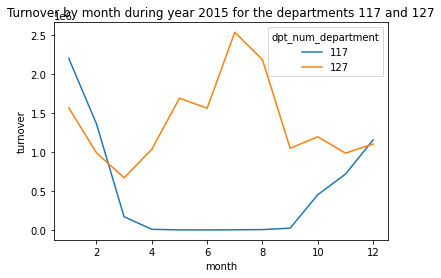

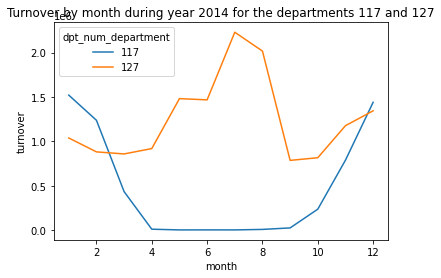

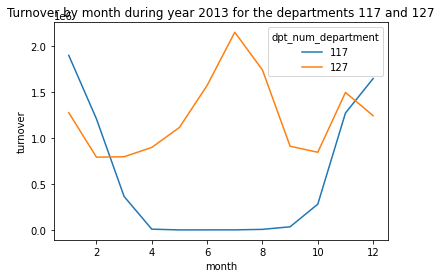

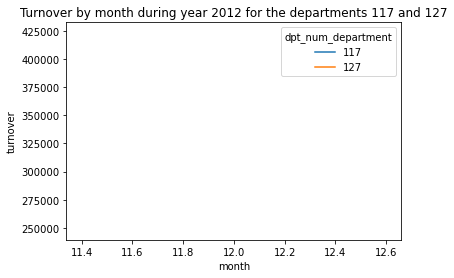

In [31]:
for i, year in enumerate(list(df_train_periode_vente["year"].unique())):
    df_train_periode_vente_filt = df_train_periode_vente[(df_train_periode_vente["year"]==year)]
    df_train_periode_vente_filt = df_train_periode_vente_filt[(df_train_periode_vente_filt["dpt_num_department"]==117) | (df_train_periode_vente_filt["dpt_num_department"]==127)]
    df_train_periode_vente_filt = df_train_periode_vente_filt[["turnover","month","dpt_num_department"]]
    df_train_periode_vente_filt_grouped = df_train_periode_vente_filt.groupby(["dpt_num_department","month"]).sum().reset_index()
    plt.figure(i)
    plt.title(f"Turnover by month during year {year} for the departments 117 and 127")
    sns.lineplot(data=df_train_periode_vente_filt_grouped, x='month', y='turnover', hue='dpt_num_department',palette="tab10")

From the different plots above, we can conclude that, during all years :
- department 117 is practiced during winter
- department 127 has a peak during summer

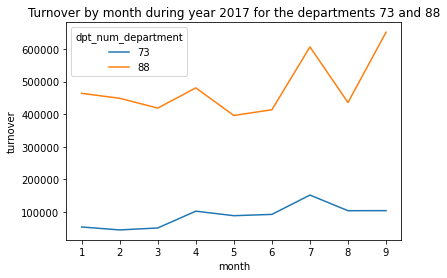

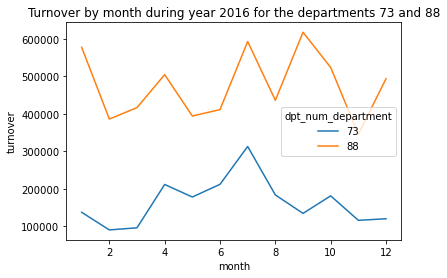

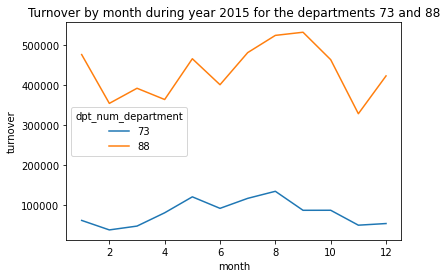

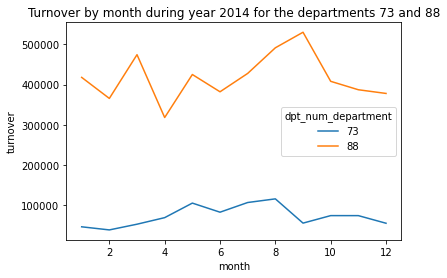

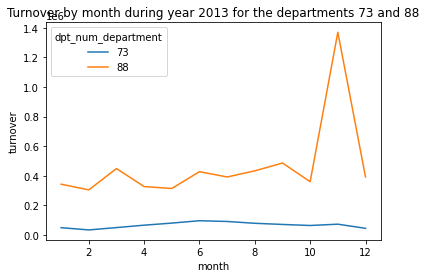

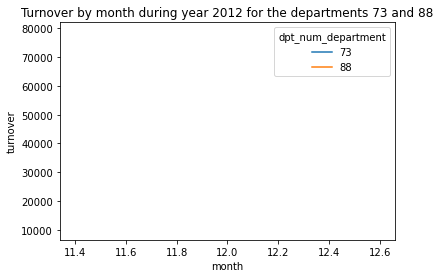

In [32]:
for i, year in enumerate(list(df_train_periode_vente["year"].unique())):
    df_train_periode_vente_filt = df_train_periode_vente[(df_train_periode_vente["year"]==year)]
    df_train_periode_vente_filt = df_train_periode_vente_filt[(df_train_periode_vente_filt["dpt_num_department"]==73) | (df_train_periode_vente_filt["dpt_num_department"]==88)]
    df_train_periode_vente_filt = df_train_periode_vente_filt[["turnover","month","dpt_num_department"]]
    df_train_periode_vente_filt_grouped = df_train_periode_vente_filt.groupby(["dpt_num_department","month"]).sum().reset_index()
    plt.figure(i)
    plt.title(f"Turnover by month during year {year} for the departments 73 and 88")
    sns.lineplot(data=df_train_periode_vente_filt_grouped, x='month', y='turnover', hue='dpt_num_department',palette="tab10")

From the different plots above, we can conclude that, during all years :
- department 88 is not periodic
- department 73 is more sold during summer

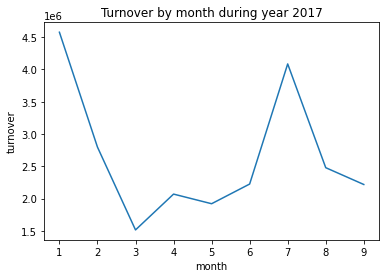

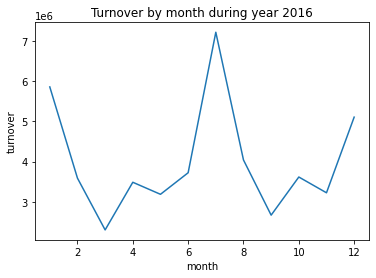

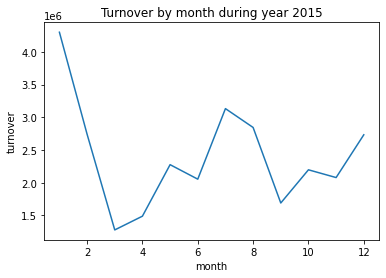

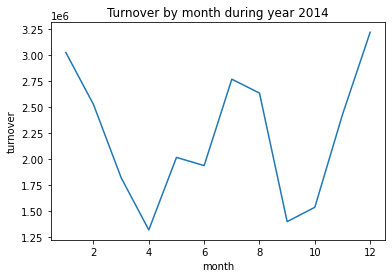

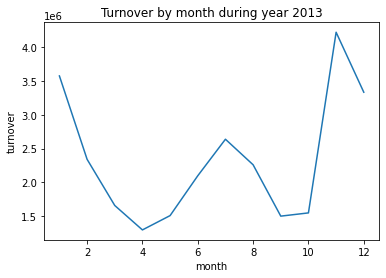

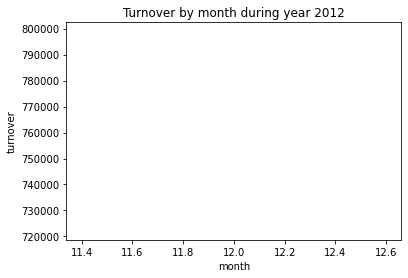

In [33]:
df_ventes = df_train[["month","year","turnover"]]
for i, year in enumerate(list(df_ventes["year"].unique())):
    df_ventes_filt = df_ventes[(df_ventes["year"]==year)]
    df_ventes_filt_grouped = df_ventes_filt.groupby(["month"]).sum().reset_index()
    plt.figure(i)
    plt.title(f"Turnover by month during year {year}")
    sns.lineplot(data=df_ventes_filt_grouped, x='month', y='turnover')

From the different plots above, we can conclude that, during all years, highest turnover is made during summer and around christmas

<Figure size 432x288 with 0 Axes>

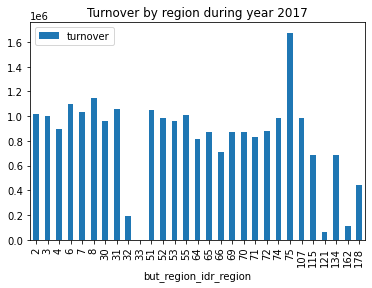

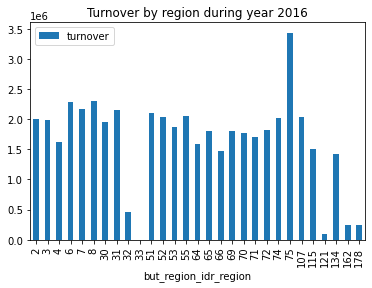

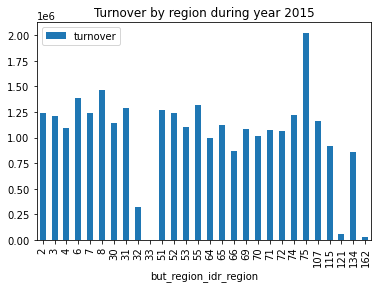

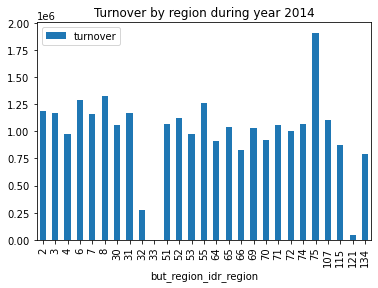

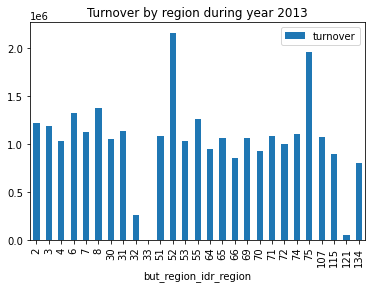

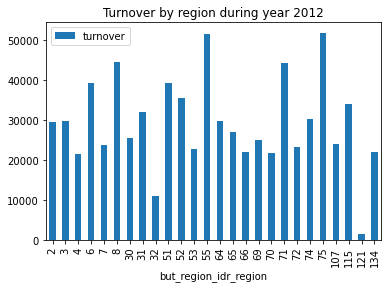

In [34]:
df_ventes_region = df_train[["year","turnover","but_num_business_unit"]]
for i, year in enumerate(list(df_ventes_region["year"].unique())):
    df_ventes_filt = df_ventes_region[(df_ventes_region["year"]==year)]
    
    df_ventes_filt_grouped = df_ventes_filt.groupby(["but_num_business_unit"]).sum().reset_index()
    
    df1 = df_ventes_filt_grouped[["turnover","but_num_business_unit"]]
    df2 = df_bu_feat[["but_num_business_unit","but_region_idr_region"]]
    result = pd.merge(left=df1, right=df2, on="but_num_business_unit")
    df_turnover_by_region = result[["turnover","but_region_idr_region"]].groupby("but_region_idr_region").sum().reset_index()
    plt.figure(i)
    df_turnover_by_region.plot.bar(y="turnover",x="but_region_idr_region")
    plt.title(f"Turnover by region during year {year}")

From the bar plots above, we can conclude that : 
- since 2014, the highest turnover is made in region idr 75
- since 2014, the lowest turnover is made in region idr 33, 162, 178 and 121.
- most of the regions have similar turnover